# Machine Learning Online Class Exercise 5 | Regularized Linear Regression and Bias-Variance

In [373]:
import numpy as np
import pandas as pd
from scipy.optimize import fmin_cg
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)

## =========== Part 1: Loading and Visualizing Data =============

In [374]:
#X: Change in water level
#y: Water flowing out of the dam
data = loadmat("ex5data1.mat")
X = data['X']
y = data['y']
Xtest = data['Xtest']
ytest = data['ytest']
Xval = data['Xval']
yval = data['yval']
#print(X.shape,y.shape,Xtest.shape,ytest.shape,Xval.shape,yval.shape)
trcol = np.array([['train'] for i in range(y.shape[0])])
train_d = np.concatenate((X,y,trcol),axis=1)
tecol = np.array([['test'] for i in range(ytest.shape[0])])
test_d = np.concatenate((Xtest,ytest,tecol),axis=1)
vacol = np.array([['val'] for i in range(yval.shape[0])])
val_d = np.concatenate((Xval,yval,vacol),axis=1)
tot_d = np.concatenate((train_d,test_d,val_d),axis=0)
tot_d.shape

(54, 3)

In [375]:
data_df = pd.DataFrame(data=tot_d, index=None, columns=['X','y','type'])
data_df['X'] = data_df['X'].astype(float)
data_df['y'] = data_df['y'].astype(float)
data_df.head()

,X,y,type
0,-15.936758,2.134311,train
1,-29.152979,1.173257,train
2,36.189549,34.359109,train
3,37.492187,36.837955,train
4,-48.058829,2.808965,train


Text(0, 0.5, 'Water flowing out')

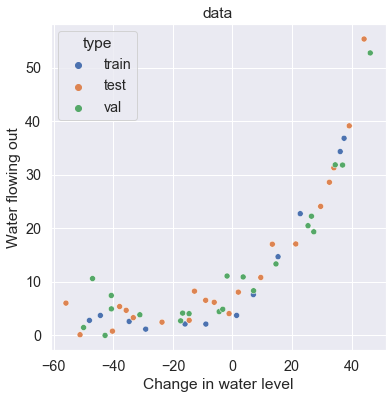

In [376]:
fig0, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(data=data_df, ax=ax, x='X', y='y', hue='type').set(title='data')
ax.set_xlabel("Change in water level")
ax.set_ylabel("Water flowing out")

## =========== Part 2: Regularized Linear Regression Cost =============

In [377]:
# Add bias column to X
X = np.insert(X, 0, np.ones(X.shape[0]), axis=1)
Xtest = np.insert(Xtest, 0, np.ones(Xtest.shape[0]), axis=1)
Xval = np.insert(Xval, 0, np.ones(Xval.shape[0]), axis=1)
X.shape,Xtest.shape,Xval.shape

((12, 2), (21, 2), (21, 2))

The regularized cost function for the regression of the m training examples is
\begin{align}
J(\vec{\theta})=&\frac{1}{2m}\sum_{\alpha=1}^m\left(y_{\alpha}-\sum_{i=1}^n\theta_ix_{i,\alpha}\right)^2+\frac{\lambda}{2m}\sum_{i>0}^n\theta_i^2\\
=&\frac{1}{2m}\sum_{\alpha=1}^m\left(y_{\alpha}- \vec{x}_{\alpha}\cdot\vec{\theta}\right)^2+\frac{\lambda}{2m}\sum_{i>0}^n\theta_i^2.
\end{align}

In [378]:
#Cost funtion J
def J(params, X, y, l):
    theta = params.reshape(X.shape[1],1)
    m = len(y)
    v1 = y-np.matmul(X,theta)
    R = l*(theta[1:]**2).sum()
    return (np.matmul(v1.T,v1)[0][0] + R)/(2*m)

In [379]:
l = 1
theta = np.array([1,1])
Jval = J(theta, X, y, l)
print("Cost at theta = (1,1): {0}".format(Jval))
print("(This value should be about 303.993192)")

Cost at theta = (1,1): 303.9931922202643
(This value should be about 303.993192)


## =========== Part 3: Regularized Linear Regression Gradient =============

The gradient is
\begin{align}
\frac{\partial J}{\partial\theta_k}=&-\frac{1}{m}\sum_{ \alpha=1}^m\left(y_{\alpha}-\vec{x}_{\alpha}\cdot\vec{\theta}\right)x_{k,\alpha}+\frac{\lambda}{m}\theta_k(1-\delta_{k0}).
\end{align}

In [380]:
#Gradient of J
def grad_J(params, X, y, l):
    theta = params.reshape(X.shape[1],1)
    m = len(y)
    v1 = y-np.matmul(X,theta)
    grad = []
    for k in range(X.shape[1]):
        tcol = X[:,k] #k column as 1d array (row vector)
        R = l * (theta[k] if k > 0 else 0)
        grad.append(np.matmul(tcol,v1) + R)
    return -np.asarray(grad).flatten()/m

In [381]:
gr = grad_J(theta, X, y, l)
print(gr.shape)
print("Gradient at theta = (1,1):\n",gr)
print("(this value should be about [-15.303016; 598.250744])")

(2,)
Gradient at theta = (1,1):
 [-15.30301567 598.08407751]
(this value should be about [-15.303016; 598.250744])


## =========== Part 4: Train Linear Regression =============

In [382]:
def trainReg(X,y,l):
    ini_theta = np.zeros((X.shape[1],1))
    theta = fmin_cg(J, ini_theta, grad_J, args=(X,y,l))
    return theta

In [383]:
l = 0
fin_theta = trainReg(X,y,l)

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5


In [384]:
def fit_line(theta, N, xmin, xmax):
    line = []
    dx = (xmax-xmin) / N
    for i in np.arange(xmin,xmax+dx,dx):
        y = np.sum([(i**j)*theta[j] for j in range(len(theta))])
        line.append([i,y])
    return pd.DataFrame(line, columns=['x', 'y'])

In [385]:
fl = fit_line(fin_theta, 5, -50, 40)

Text(0, 0.5, 'Water flowing out')

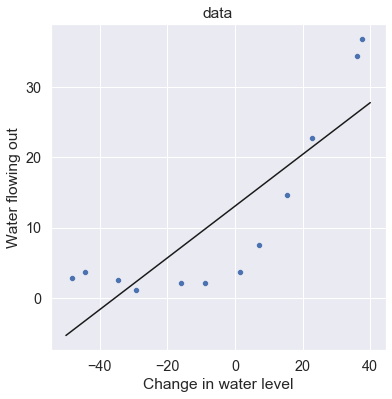

In [386]:
fig1, ax = plt.subplots(figsize=(6, 6))
train_df = data_df[data_df['type']=='train'] 
sns.scatterplot(data=train_df, ax=ax, x='X', y='y').set(title='data')
sns.lineplot(data=fl, ax=ax, x='x', y='y', color='k')
ax.set_xlabel("Change in water level")
ax.set_ylabel("Water flowing out")

This is a model with high bias (underfitting).

## =========== Part 5: Learning Curve for Linear Regression =============

In [409]:
#Learning curve: error as a function of the training set size
def sizeLearningCurve(X, y, Xval, yval, l):
    err = []
    m = len(y)
    for sz in range(1,m+1):
        theta = trainReg(X[:sz,:],y[:sz,:],l)
        errT = J(theta, X[:sz,:], y[:sz,:], l)
        err.append([sz,errT,'train'])
        errV = J(theta, Xval, yval, l)
        err.append([sz,errV,'val'])
    return pd.DataFrame(err, columns=['size','error','type'])

In [410]:
l = 0
lc_df = sizeLearningCurve(X, y, Xval, yval, l)
lc_df.head()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 8
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 22
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 19.443963
         Iterations: 22
         Function evaluations: 34
        

,size,error,type
0,1,3.944305e-31,train
1,1,2.051211e+02,val
2,2,2.859621e-30,train
3,2,1.103004e+02,val
4,3,3.286595e+00,train


Text(0.5, 0, 'training size')

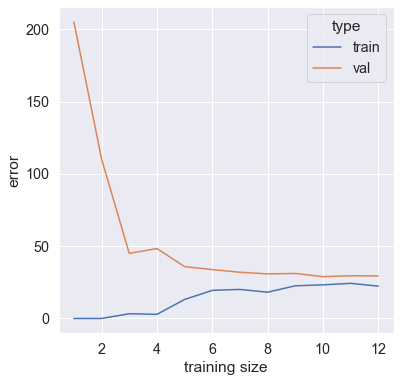

In [389]:
fig2, ax = plt.subplots(figsize=(6, 6))
sns.lineplot(data=lc_df, ax=ax, x='size', y='error', hue='type')
ax.set_xlabel('training size')

It is observed that at large size the error is still fairly large ($\sim 25$) and the gap between the errors in the training and validation set is small. This happens because the model is too simple (high bias), and even if it hass a lot of data it cannot describe well any data set.

## =========== Part 6: Feature Mapping for Polynomial Regression =============

In [390]:
#Generate polynomial features
def polyFeatures(X, degree):
    df = pd.DataFrame(X, columns=['1','x'])
    for i in range(2,degree+1):
        tag = 'x^{0}'.format(i)
        df[tag] = df['x']**i
    #display(df.head())
    return df.to_numpy()
    
#Normalize features
def featureNormalize(X):
    Xn = np.copy(X)
    mu = [1.0]
    sig = [0.0]
    for c in range(1,Xn.shape[1]):
        av = np.mean(Xn[:,c])
        dev = np.std(Xn[:,c])
        Xn[:,c] = Xn[:,c]-av
        Xn[:,c] = Xn[:,c]/dev
        mu.append(av)
        sig.append(dev)
    return Xn, mu, sig

#Normalize features with external parameters
def featureNormalizeOther(X, mu, sigma):
    Xn = np.copy(X)
    for c in range(1,Xn.shape[1]):
        Xn[:,c] = Xn[:,c]-mu[c]
        Xn[:,c] = Xn[:,c]/sigma[c]
    return Xn

In [391]:
#Add polynomial features and normalize training set
deg = 8
Xpoly = polyFeatures(X, deg)
Xpoly_norm, mu, sigma = featureNormalize(Xpoly)
Xpoly_norm.shape

(12, 9)

In [392]:
#Add poly features and normalize the validation set with the training prameters
Xvalpoly = polyFeatures(Xval, deg)
Xvalpoly_norm = featureNormalizeOther(Xvalpoly, mu, sigma)
Xvalpoly_norm.shape

(21, 9)

In [393]:
#Train model
l = 0
fin_theta_norm = trainReg(Xpoly_norm,y,l)

Optimization terminated successfully.
         Current function value: 0.028891
         Iterations: 656
         Function evaluations: 1268
         Gradient evaluations: 1268


In [394]:
def fit_norm_line(theta, N, xmin, xmax, mu, sigma):
    line = []
    dx = (xmax-xmin) / N
    for i in np.arange(xmin,xmax+dx,dx): 
        #Normalize features
        x = [(i**j-mu[j])/sigma[j] for j in range(1,len(theta))]
        x.insert(0,1.0)
        #Compute value
        y = np.sum([x[j]*theta[j] for j in range(len(theta))])
        line.append([i,y])
    return pd.DataFrame(line, columns=['x', 'y'])

In [395]:
fl_df = fit_norm_line(fin_theta_norm, 100, -50, 42, mu, sigma)

Text(0, 0.5, 'Water flowing out')

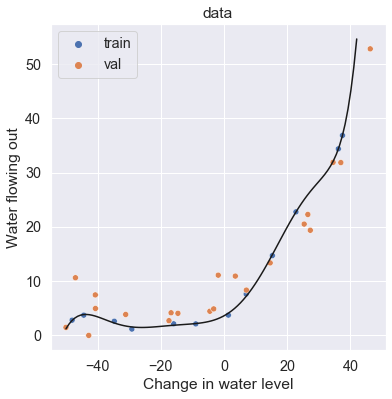

In [396]:
fig3, ax = plt.subplots(figsize=(6, 6))
tv_df = data_df.query('type == "train" or type == "val"')
sns.scatterplot(data=tv_df, ax=ax, x='X', y='y', hue='type').set(title='data')
sns.lineplot(data=fl_df, ax=ax, x='x', y='y', color='k')
ax.set_xlabel("Change in water level")
ax.set_ylabel("Water flowing out")
#ax.set_ylim([0,1000])

## =========== Part 7: Learning Curve for Polynomial Regression =============

In [397]:
l = 0
lp_df = sizeLearningCurve(Xpoly_norm, y, Xvalpoly_norm, yval, l)
lp_df.head()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 240
         Function evaluations: 437
       

,size,error,type
0,1,0.000000e+00,train
1,1,1.614422e+02,val
2,2,6.162976e-32,train
3,2,1.607923e+02,val
4,3,4.617443e-11,train


Text(0.5, 0, 'training size')

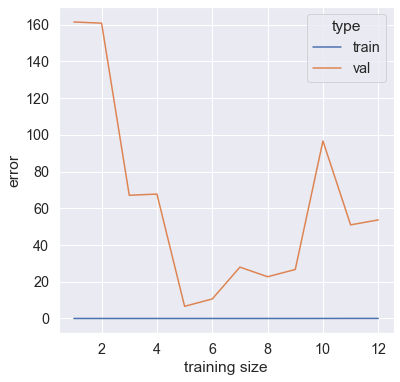

In [398]:
fig4, ax = plt.subplots(figsize=(6, 6))
sns.lineplot(data=lp_df, ax=ax, x='size', y='error', hue='type')
ax.set_xlabel('training size')

As the amount of training data increases one observes a low error for the training data but a high error for the validation data. This is a signal of a high variance model, where the model fits the training data too well but the validation data quite badly. 

##  =========== Part 8: Validation for Selecting Lambda =============

In [411]:
#Learning curve: error as a function of the regularization parameter
def regLearningCurve(X, y, Xval, yval, lvals):
    err = []
    m = len(y)
    for l in lvals:
        theta = trainReg(X,y,l)
        errT = J(theta, X, y, l)
        err.append([l,errT,'train'])
        errV = J(theta, Xval, yval, l)
        err.append([l,errV,'val'])
    return pd.DataFrame(err, columns=['size','error','type'])

In [400]:
lvals = list(np.arange(0,1.0,0.02))
print(lvals)
rp_df = regLearningCurve(Xpoly_norm, y, Xvalpoly_norm, yval, lvals)
rp_df.head()

[0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7000000000000001, 0.72, 0.74, 0.76, 0.78, 0.8, 0.8200000000000001, 0.84, 0.86, 0.88, 0.9, 0.92, 0.9400000000000001, 0.96, 0.98]
Optimization terminated successfully.
         Current function value: 0.028891
         Iterations: 656
         Function evaluations: 1268
         Gradient evaluations: 1268
         Current function value: 0.604521
         Iterations: 21
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 0.833722
         Iterations: 13
         Function evaluations: 69
         Gradient evaluations: 58
         Current function value: 1.028912
         Iterations: 12
         Function evaluations: 101
         Gradient evaluations: 90
         Current function value: 1.567389
         Iterations: 8
         Function eva

,size,error,type
0,0.00,0.028891,train
1,0.00,53.664674,val
2,0.02,0.604521,train
3,0.02,9.955781,val
4,0.04,0.833722,train


Text(0.5, 0, '$\\lambda$')

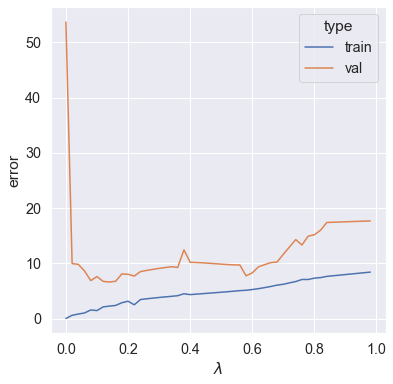

In [401]:
fig5, ax = plt.subplots(figsize=(6, 6))
sns.lineplot(data=rp_df, ax=ax, x='size', y='error', hue='type')
ax.set_xlabel(r'$\lambda$')

The error with the validation set appears to be minimum around $\lambda\sim0.15$.

In [405]:
#Train model
fin_theta_norm1 = trainReg(Xpoly_norm,y,0)
fin_theta_norm2 = trainReg(Xpoly_norm,y,0.15)
fin_theta_norm3 = trainReg(Xpoly_norm,y,0.5)
fin_theta_norm4 = trainReg(Xpoly_norm,y,2.0)

Optimization terminated successfully.
         Current function value: 0.028891
         Iterations: 656
         Function evaluations: 1268
         Gradient evaluations: 1268
         Current function value: 2.174013
         Iterations: 8
         Function evaluations: 119
         Gradient evaluations: 107
         Current function value: 4.774650
         Iterations: 5
         Function evaluations: 53
         Gradient evaluations: 41
         Current function value: 14.019643
         Iterations: 4
         Function evaluations: 117
         Gradient evaluations: 105


In [406]:
fl_df1 = fit_norm_line(fin_theta_norm1, 100, -50, 42, mu, sigma)
fl_df2 = fit_norm_line(fin_theta_norm2, 100, -50, 42, mu, sigma)
fl_df3 = fit_norm_line(fin_theta_norm3, 100, -50, 42, mu, sigma)
fl_df4 = fit_norm_line(fin_theta_norm4, 100, -50, 42, mu, sigma)

[Text(0.5, 1.0, '$\\lambda=2.0$')]

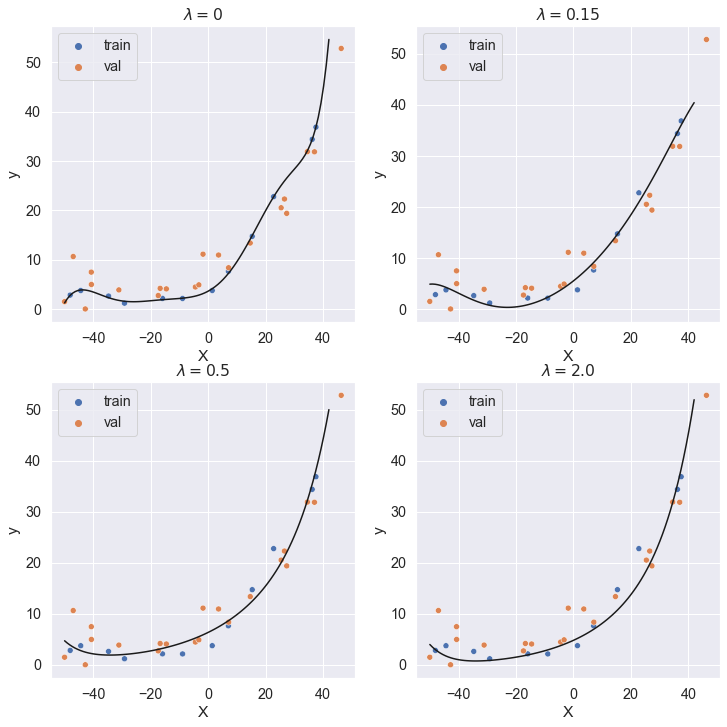

In [407]:
fig6, ax = plt.subplots(2,2,figsize=(12, 12))
sns.scatterplot(data=tv_df, ax=ax[0][0], x='X', y='y', hue='type')
sns.lineplot(data=fl_df1, ax=ax[0][0], x='x', y='y', color='k').set(title=r'$\lambda=0$')
sns.scatterplot(data=tv_df, ax=ax[0][1], x='X', y='y', hue='type')
sns.lineplot(data=fl_df2, ax=ax[0][1], x='x', y='y', color='k').set(title=r'$\lambda=0.15$')
sns.scatterplot(data=tv_df, ax=ax[1][0], x='X', y='y', hue='type')
sns.lineplot(data=fl_df3, ax=ax[1][0], x='x', y='y', color='k').set(title=r'$\lambda=0.5$')
sns.scatterplot(data=tv_df, ax=ax[1][1], x='X', y='y', hue='type')
sns.lineplot(data=fl_df4, ax=ax[1][1], x='x', y='y', color='k').set(title=r'$\lambda=2.0$')
#ax[0][0].set_xlabel("Change in water level")
#ax[0][0].set_ylabel("Water flowing out")
#ax[0][0].set_ylim([0,1000])

Tough the minimum error is around $\lambda\sim0.15$ it stills looks like an overfit, the curve for $\lambda\sim0.5$ looks a bit more general.

In [408]:
#Add poly features and normalize the test set with the training prameters
Xtestpoly = polyFeatures(Xtest, deg)
Xtestpoly_norm = featureNormalizeOther(Xtestpoly, mu, sigma)
Xtestpoly_norm.shape

(21, 9)

In [412]:
#Compute the error of the test set with the chosen lambda
l = 0.5
errT = J(fin_theta_norm3, Xtestpoly_norm, ytest, l)
errT

4.853668039360709

Text(0, 0.5, 'Water flowing out')

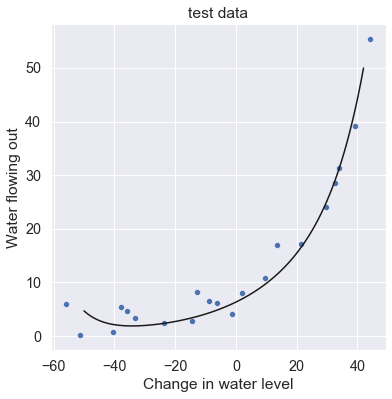

In [416]:
fig7, ax = plt.subplots(figsize=(6, 6))
test_df = data_df.query('type == "test"')
sns.scatterplot(data=test_df, ax=ax, x='X', y='y').set(title='test data')
sns.lineplot(data=fl_df3, ax=ax, x='x', y='y', color='k')
ax.set_xlabel("Change in water level")
ax.set_ylabel("Water flowing out")
#ax.set_ylim([0,1000])